Validation: 100%|█████████████████████████████████████████████████████████████████████| 656/656 [00:22<00:00, 29.29it/s]



Epoch 1/5
Block 1 - Train MSE: 0.7217, Pearson: 0.0066, Cosine: -0.0079
Block 1 - Val MSE: 0.9266, Pearson: 0.0147, Cosine: -0.0069
Block 2 - Train MSE: 1.0724, Pearson: 0.0034, Cosine: 0.7942
Block 2 - Val MSE: 1.7866, Pearson: 0.0056, Cosine: 0.8031
Block 3 - Train MSE: 0.2434, Pearson: 0.0037, Cosine: 0.7921
Block 3 - Val MSE: 0.2590, Pearson: 0.0011, Cosine: 0.8017
Block 4 - Train MSE: 0.2409, Pearson: 0.0017, Cosine: 0.7963
Block 4 - Val MSE: 0.2530, Pearson: 0.0005, Cosine: 0.8037


Validation: 100%|█████████████████████████████████████████████████████████████████████| 656/656 [00:22<00:00, 29.61it/s]



Epoch 2/5
Block 1 - Train MSE: 0.8944, Pearson: 0.0232, Cosine: -0.0017
Block 1 - Val MSE: 0.9644, Pearson: 0.0250, Cosine: -0.0007
Block 2 - Train MSE: 2.7749, Pearson: 0.0100, Cosine: 0.8002
Block 2 - Val MSE: 3.1560, Pearson: 0.0141, Cosine: 0.8036
Block 3 - Train MSE: 0.2358, Pearson: 0.0048, Cosine: 0.7995
Block 3 - Val MSE: 0.2528, Pearson: 0.0089, Cosine: 0.8037
Block 4 - Train MSE: 0.2349, Pearson: 0.0022, Cosine: 0.8004
Block 4 - Val MSE: 0.2521, Pearson: 0.0020, Cosine: 0.8040


Validation: 100%|█████████████████████████████████████████████████████████████████████| 656/656 [00:22<00:00, 29.28it/s]



Epoch 3/5
Block 1 - Train MSE: 0.9922, Pearson: 0.0301, Cosine: 0.0023
Block 1 - Val MSE: 1.0838, Pearson: 0.0314, Cosine: -0.0004
Block 2 - Train MSE: 3.9930, Pearson: 0.0224, Cosine: 0.8004
Block 2 - Val MSE: 6.0380, Pearson: 0.0274, Cosine: 0.8037
Block 3 - Train MSE: 0.2348, Pearson: 0.0054, Cosine: 0.8000
Block 3 - Val MSE: 0.2548, Pearson: 0.0105, Cosine: 0.8037
Block 4 - Train MSE: 0.2345, Pearson: 0.0026, Cosine: 0.8006
Block 4 - Val MSE: 0.2541, Pearson: 0.0045, Cosine: 0.8041


Validation: 100%|█████████████████████████████████████████████████████████████████████| 656/656 [00:21<00:00, 30.08it/s]



Epoch 4/5
Block 1 - Train MSE: 1.1443, Pearson: 0.0376, Cosine: 0.0060
Block 1 - Val MSE: 1.3077, Pearson: 0.0260, Cosine: 0.0053
Block 2 - Train MSE: 6.8884, Pearson: 0.0337, Cosine: 0.8007
Block 2 - Val MSE: 6.6756, Pearson: 0.0293, Cosine: 0.8039
Block 3 - Train MSE: 0.2348, Pearson: 0.0050, Cosine: 0.8000
Block 3 - Val MSE: 0.2529, Pearson: 0.0015, Cosine: 0.8035
Block 4 - Train MSE: 0.2343, Pearson: 0.0034, Cosine: 0.8006
Block 4 - Val MSE: 0.2521, Pearson: 0.0030, Cosine: 0.8042


Validation: 100%|█████████████████████████████████████████████████████████████████████| 656/656 [00:22<00:00, 29.51it/s]



Epoch 5/5
Block 1 - Train MSE: 1.3476, Pearson: 0.0387, Cosine: 0.0140
Block 1 - Val MSE: 1.5336, Pearson: 0.0451, Cosine: 0.0160
Block 2 - Train MSE: 7.0649, Pearson: 0.0417, Cosine: 0.8010
Block 2 - Val MSE: 8.0729, Pearson: 0.0406, Cosine: 0.8044
Block 3 - Train MSE: 0.2347, Pearson: 0.0033, Cosine: 0.8002
Block 3 - Val MSE: 0.2524, Pearson: 0.0043, Cosine: 0.8038
Block 4 - Train MSE: 0.2342, Pearson: 0.0041, Cosine: 0.8007
Block 4 - Val MSE: 0.2518, Pearson: 0.0054, Cosine: 0.8042


Testing: 100%|██████████████████████████████████████████████████████████████████████| 1575/1575 [00:29<00:00, 53.68it/s]


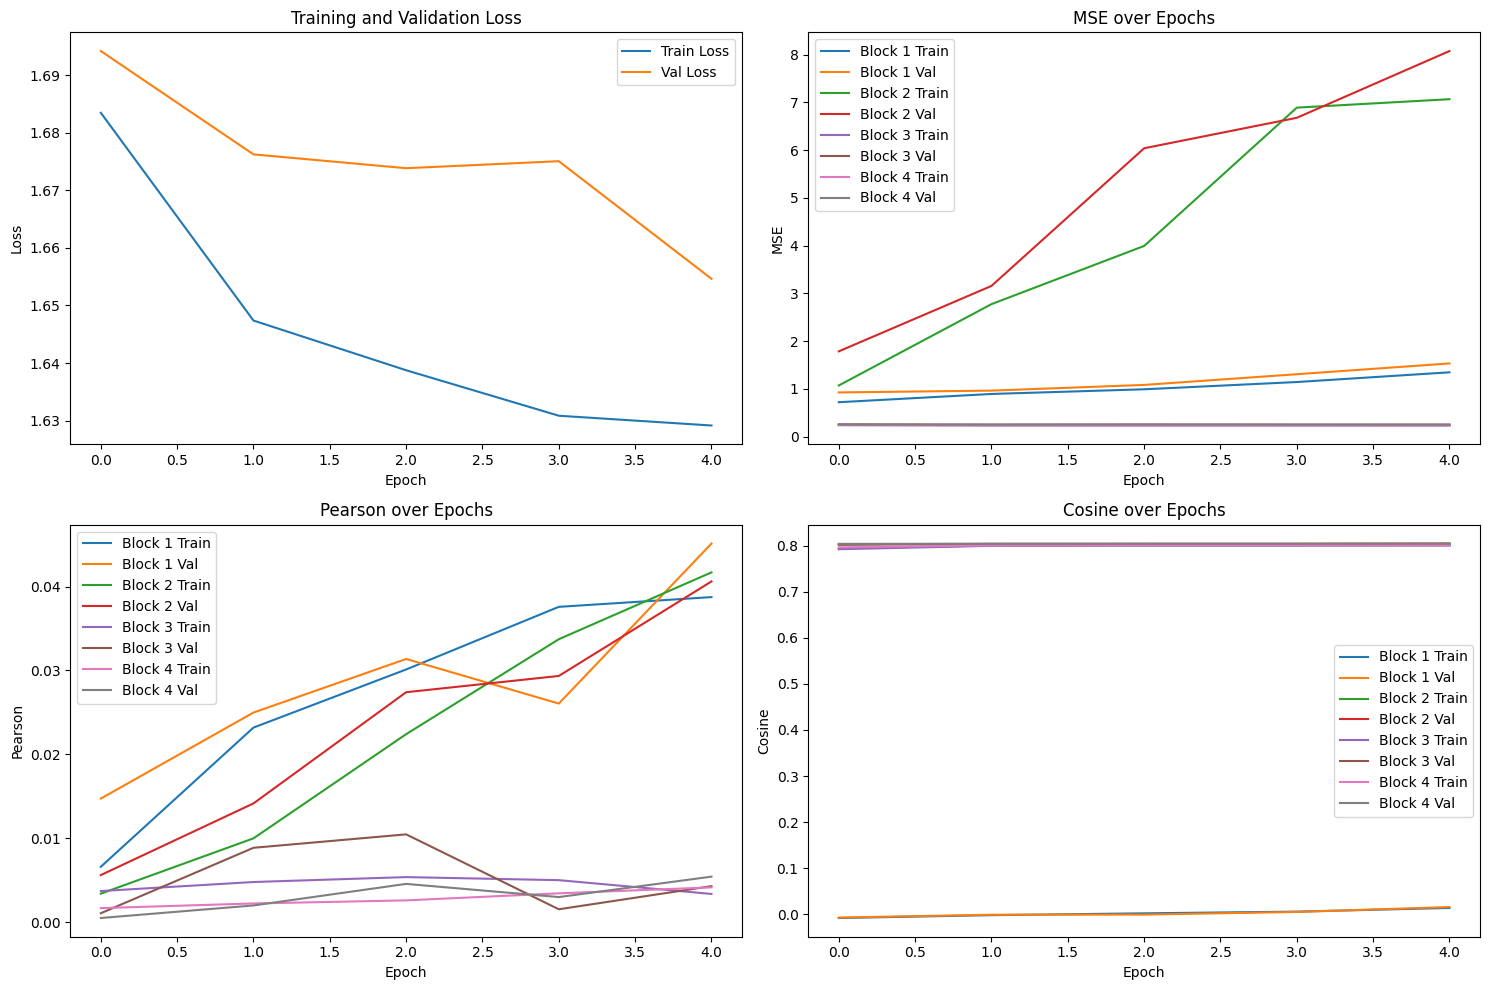

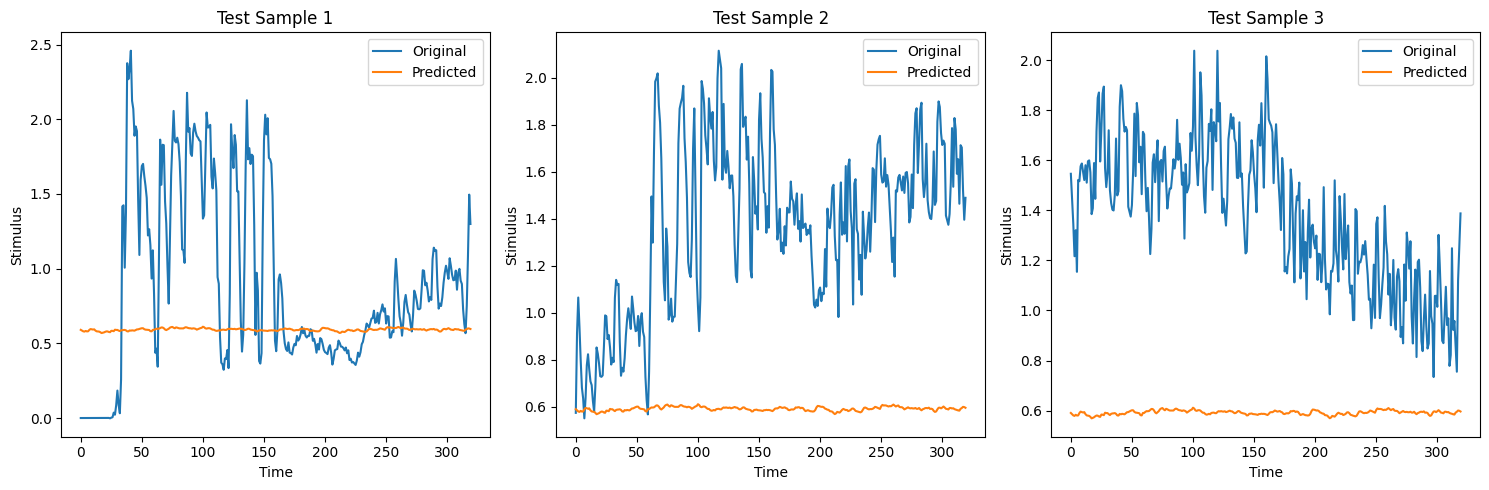

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch.amp import GradScaler, autocast
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import torch.utils.checkpoint as checkpoint

# Set expandable segments
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Clear GPU memory
torch.cuda.empty_cache()

# Hyperparameters
hyperparameters = {
    'batch_size': 16,  # Balanced for speed and memory
    'num_epochs': 5,
    'learning_rate': 0.001,
    'cnn_filters': [64, 128, 256, 512],
    'lstm_hidden': 128,
    'mlp_hidden': [256, 128, 64],
    'cnn_kernel_size': 3,
    'lstm_layers': 1,
    'dropout_rate': 0.3
}

# Data Loading (Your Code)
def prepare_dataset(data):
    eeg_list = []
    stim_list = []
    for eeg, stim in data:
        eeg_list.append(eeg.float())  # (320, 64)
        stim_list.append(stim.float())  # (320,)
    eeg_tensor = torch.stack(eeg_list)  # (N, 320, 64)
    stim_tensor = torch.stack(stim_list)  # (N, 320)
    return eeg_tensor, stim_tensor

# Alternative: Custom Dataset for Low RAM
class CustomDataset(Dataset):
    def __init__(self, pt_file):
        self.data = torch.load(pt_file, map_location='cpu')
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        eeg, stim = self.data[idx]
        return eeg.float(), stim.float()

# Model Definition
class EEGStimModel(nn.Module):
    def __init__(self, input_channels=64, output_dim=320):
        super(EEGStimModel, self).__init__()
        self.filters = hyperparameters['cnn_filters']
        self.lstm_hidden = hyperparameters['lstm_hidden']
        self.kernel_size = hyperparameters['cnn_kernel_size']
        self.lstm_layers = hyperparameters['lstm_layers']
        self.dropout_rate = hyperparameters['dropout_rate']
        self.mlp_hidden = hyperparameters['mlp_hidden']

        # Block 1: CNN + LSTM (Pearson)
        self.block1_convs = nn.ModuleList()
        in_channels = input_channels
        for out_channels in self.filters:
            self.block1_convs.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels, kernel_size=self.kernel_size, padding=1),
                    nn.ReLU(),
                    nn.BatchNorm1d(out_channels),
                    nn.Dropout(self.dropout_rate)
                )
            )
            in_channels = out_channels
        self.block1_lstm = nn.LSTM(in_channels * 320, self.lstm_hidden, num_layers=self.lstm_layers, batch_first=True)
        self.block1_fc = nn.Linear(self.lstm_hidden, output_dim)

        # Block 2: CNN + LSTM (Cosine)
        self.block2_convs = nn.ModuleList()
        in_channels = input_channels
        for out_channels in self.filters:
            self.block2_convs.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels, kernel_size=self.kernel_size, padding=1),
                    nn.ReLU(),
                    nn.BatchNorm1d(out_channels),
                    nn.Dropout(self.dropout_rate)
                )
            )
            in_channels = out_channels
        self.block2_lstm = nn.LSTM(in_channels * 320, self.lstm_hidden, num_layers=self.lstm_layers, batch_first=True)
        self.block2_fc = nn.Linear(self.lstm_hidden, output_dim)

        # Block 3: CNN + LSTM (MSE)
        self.block3_convs = nn.ModuleList()
        in_channels = input_channels
        for out_channels in self.filters:
            self.block3_convs.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, out_channels, kernel_size=self.kernel_size, padding=1),
                    nn.ReLU(),
                    nn.BatchNorm1d(out_channels),
                    nn.Dropout(self.dropout_rate)
                )
            )
            in_channels = out_channels
        self.block3_lstm = nn.LSTM(in_channels * 320, self.lstm_hidden, num_layers=self.lstm_layers, batch_first=True)
        self.block3_fc = nn.Linear(self.lstm_hidden, output_dim)

        # Block 4: CNN + MLP
        self.block4_conv = nn.Sequential(
            nn.Conv1d(3, 128, kernel_size=self.kernel_size, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(self.dropout_rate)
        )
        mlp_layers = []
        in_features = 128 * output_dim
        for hidden_units in self.mlp_hidden:
            mlp_layers.append(nn.Linear(in_features, hidden_units))
            mlp_layers.append(nn.ReLU())
            mlp_layers.append(nn.Dropout(self.dropout_rate))
            in_features = hidden_units
        mlp_layers.append(nn.Linear(in_features, output_dim))
        self.block4_mlp = nn.Sequential(*mlp_layers)

    def forward(self, x):
        x1 = x.permute(0, 2, 1)
        for conv in self.block1_convs:
            x1 = checkpoint.checkpoint(conv, x1, use_reentrant=False)
        x1 = x1.view(x1.size(0), -1).unsqueeze(1)
        x1, _ = self.block1_lstm(x1)
        out1 = self.block1_fc(x1.squeeze(1))

        x2 = x.permute(0, 2, 1)
        for conv in self.block2_convs:
            x2 = checkpoint.checkpoint(conv, x2, use_reentrant=False)
        x2 = x2.view(x2.size(0), -1).unsqueeze(1)
        x2, _ = self.block2_lstm(x2)
        out2 = self.block2_fc(x2.squeeze(1))

        x3 = x.permute(0, 2, 1)
        for conv in self.block3_convs:
            x3 = checkpoint.checkpoint(conv, x3, use_reentrant=False)
        x3 = x3.view(x3.size(0), -1).unsqueeze(1)
        x3, _ = self.block3_lstm(x3)
        out3 = self.block3_fc(x3.squeeze(1))

        combined = torch.stack([out1, out2, out3], dim=1)
        x4 = checkpoint.checkpoint(self.block4_conv, combined, use_reentrant=False)
        x4 = x4.view(x4.size(0), -1)
        out4 = self.block4_mlp(x4)
        return out1, out2, out3, out4

# Custom Pearson Correlation Loss
class PearsonCorrelationLoss(nn.Module):
    def forward(self, pred, target):
        pred = pred - torch.mean(pred, dim=1, keepdim=True)
        target = target - torch.mean(target, dim=1, keepdim=True)
        pred_norm = torch.sqrt(torch.sum(pred ** 2, dim=1, keepdim=True))
        target_norm = torch.sqrt(torch.sum(target ** 2, dim=1, keepdim=True))
        corr = torch.sum(pred * target, dim=1, keepdim=True) / (pred_norm * target_norm + 1e-8)
        return 1 - torch.mean(corr)

# Metrics Computation
def compute_metrics(pred, target):
    mse = nn.MSELoss()(pred, target).item()
    cos_sim = nn.CosineSimilarity(dim=1)(pred, target).mean().item()
    pred_np = pred.detach().cpu().numpy()
    target_np = target.detach().cpu().numpy()
    pearson = np.mean([pearsonr(pred_np[i], target_np[i])[0] for i in range(len(pred_np))])
    return mse, pearson, cos_sim

# Training Function
def train_model(model, X_train, y_train, X_val, y_val):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    if device.type == "cpu":
        print("Error: GPU required, falling back to CPU (not recommended)")
    
    model = model.to(device)
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=hyperparameters['batch_size'], shuffle=True, pin_memory=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=hyperparameters['batch_size'], shuffle=False, pin_memory=True, num_workers=4)

    optimizer = optim.Adam(model.parameters(), lr=hyperparameters['learning_rate'])
    criterion_pearson = PearsonCorrelationLoss()
    criterion_cosine = nn.CosineEmbeddingLoss()
    criterion_mse = nn.MSELoss()
    scaler = GradScaler('cuda')

    history = {'train_loss': [], 'val_loss': [], 'train_metrics': [], 'val_metrics': []}

    for epoch in range(hyperparameters['num_epochs']):
        model.train()
        total_loss = 0
        train_metrics = {'block1': [], 'block2': [], 'block3': [], 'block4': []}
        for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{hyperparameters['num_epochs']}"):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast('cuda'):
                out1, out2, out3, out4 = model(X_batch)
                loss1 = criterion_pearson(out1, y_batch)
                loss2 = criterion_cosine(out2, y_batch, torch.ones(y_batch.size(0)).to(device))
                loss3 = criterion_mse(out3, y_batch)
                loss4 = criterion_mse(out4, y_batch)
                loss = loss1 + loss2 + loss3 + loss4

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            total_loss += loss.item()

            for i, out in enumerate([out1, out2, out3, out4], 1):
                mse, pearson, cos_sim = compute_metrics(out, y_batch)
                train_metrics[f'block{i}'].append((mse, pearson, cos_sim))
            
            del X_batch, y_batch, out1, out2, out3, out4
            torch.cuda.empty_cache()

        avg_train_loss = total_loss / len(train_loader)
        avg_train_metrics = {
            f'block{i}': tuple(np.mean([m[j] for m in train_metrics[f'block{i}']], axis=0) for j in range(3))
            for i in range(1, 5)
        }

        model.eval()
        val_losses = []
        val_metrics = {'block1': [], 'block2': [], 'block3': [], 'block4': []}
        with torch.no_grad():
            for X_val_batch, y_val_batch in tqdm(val_loader, desc="Validation"):
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
                with autocast('cuda'):
                    out1, out2, out3, out4 = model(X_val_batch)
                    val_loss1 = criterion_pearson(out1, y_val_batch)
                    val_loss2 = criterion_cosine(out2, y_val_batch, torch.ones(y_val_batch.size(0)).to(device))
                    val_loss3 = criterion_mse(out3, y_val_batch)
                    val_loss4 = criterion_mse(out4, y_val_batch)
                    val_losses.append(val_loss1 + val_loss2 + val_loss3 + val_loss4)
                    for j, out in enumerate([out1, out2, out3, out4], 1):
                        mse, pearson, cos_sim = compute_metrics(out, y_val_batch)
                        val_metrics[f'block{j}'].append((mse, pearson, cos_sim))
                
                del X_val_batch, y_val_batch, out1, out2, out3, out4
                torch.cuda.empty_cache()

        val_loss = torch.mean(torch.stack(val_losses))
        val_metrics = {
            f'block{i}': tuple(np.mean([m[j] for m in val_metrics[f'block{i}']], axis=0) for j in range(3))
            for i in range(1, 5)
        }

        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss.item())
        history['train_metrics'].append(avg_train_metrics)
        history['val_metrics'].append(val_metrics)

        print(f"\nEpoch {epoch+1}/{hyperparameters['num_epochs']}")
        for i in range(1, 5):
            t_mse, t_pearson, t_cos = avg_train_metrics[f'block{i}']
            v_mse, v_pearson, v_cos = val_metrics[f'block{i}']
            print(f"Block {i} - Train MSE: {t_mse:.4f}, Pearson: {t_pearson:.4f}, Cosine: {t_cos:.4f}")
            print(f"Block {i} - Val MSE: {v_mse:.4f}, Pearson: {v_pearson:.4f}, Cosine: {v_cos:.4f}")

        torch.cuda.empty_cache()

    return history

# Plotting Function
def plot_results(history, X_test, y_test, model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=hyperparameters['batch_size'], shuffle=False, pin_memory=True, num_workers=4)
    outputs = []
    y_test_all = []
    with torch.no_grad():
        for X_test_batch, y_test_batch in tqdm(test_loader, desc="Testing"):
            X_test_batch = X_test_batch.to(device)
            with autocast('cuda'):
                _, _, _, out4 = model(X_test_batch)
            outputs.append(out4.cpu())
            y_test_all.append(y_test_batch.cpu())
            del X_test_batch
            torch.cuda.empty_cache()
        out4 = torch.cat(outputs, dim=0)
        y_test = torch.cat(y_test_all, dim=0)

    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    for i, metric in enumerate(['MSE', 'Pearson', 'Cosine'], 1):
        plt.subplot(2, 2, i+1)
        for block in range(1, 5):
            train_metric = [m[f'block{block}'][i-1] for m in history['train_metrics']]
            val_metric = [m[f'block{block}'][i-1] for m in history['val_metrics']]
            plt.plot(train_metric, label=f'Block {block} Train')
            plt.plot(val_metric, label=f'Block {block} Val')
        plt.title(f'{metric} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    num_samples = 3
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.plot(y_test[i].numpy(), label='Original')
        plt.plot(out4[i].numpy(), label='Predicted')
        plt.title(f'Test Sample {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Stimulus')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Load data
    train_data = torch.load('train.pt')
    val_data = torch.load('val.pt')
    test_data = torch.load('test.pt')

    # Prepare datasets
    X_train, y_train = prepare_dataset(train_data)
    X_val, y_val = prepare_dataset(val_data)
    X_test, y_test = prepare_dataset(test_data)

    # Optional: Free memory after loading
    del train_data, val_data, test_data
    torch.cuda.empty_cache()

    model = EEGStimModel()
    history = train_model(model, X_train, y_train, X_val, y_val)
    plot_results(history, X_test, y_test, model)